# Result = 74%

# Default Setup

In [0]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

     |████████████████████████████████| 2.0MB 3.7MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data

Classification: 100%|██████████| 9693/9693 [00:00<00:00, 23032.49it/s]



              precision    recall  f1-score   support

    negative       0.81      0.85      0.83      4830
    positive       0.85      0.80      0.82      4863

    accuracy                           0.83      9693
   macro avg       0.83      0.83      0.83      9693
weighted avg       0.83      0.83      0.83      9693


 Accuracy: 0.826

[ updating evaluations cache ]


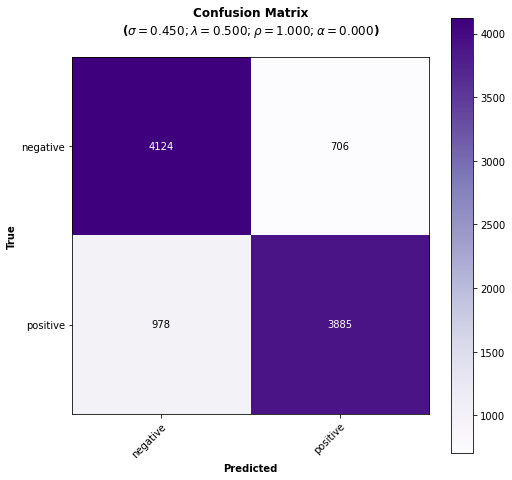

0.8261606893876456

In [0]:
df = pd.read_csv(path_root + data_root + "IMDBReviews/IMDB Dataset.csv", sep=";")
df['review'].replace({'<br />': '\\n'}, inplace=True, regex=True)
df.dropna(inplace=True)
text = df['review'].to_list()
labels = df['sentiment'].to_list()
X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)

clf = SS3()
clf.fit(X_train, y_train)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

## Remove Paragraph Capabilities

In [0]:
def replicate_reviews(text, labels):
  par_text = []
  par_labels = []
  for index in range(len(text)):
    splitted_text = text[index].split("\n\n")
    for split in splitted_text:
      par_text.append(split)
      par_labels.append(labels[index])
  return par_text, par_labels

text = df['review'].to_list()
labels = df['sentiment'].to_list()
X_train_par, y_train_par = replicate_reviews(X_train, y_train)
X_val_par, y_val_par = replicate_reviews(X_val, y_val)

## Work with Classifier

Classification: 100%|██████████| 29551/29551 [00:00<00:00, 45537.95it/s]



              precision    recall  f1-score   support

    negative       0.74      0.74      0.74     15001
    positive       0.73      0.73      0.73     14550

    accuracy                           0.73     29551
   macro avg       0.73      0.73      0.73     29551
weighted avg       0.73      0.73      0.73     29551


 Accuracy: 0.734

[ updating evaluations cache ]


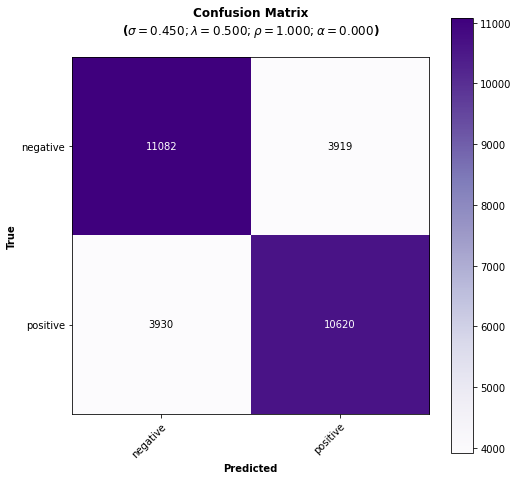

0.7343264548005913

In [0]:
clf = SS3()
clf.fit(X_train_par, y_train_par)
Evaluation.test(clf, X_val_par, y_val_par, metric="f1-score")